# Heart Disease Risk Analysis - Exploratory Data Analysis (EDA)

- Download the CDC data from this location

  https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/download?datasetVersionNumber=6

- Unzip the file
- Use the 2020/heart_2020_cleaned.csv file as this file has the HeartDisease Yes/No value
  

## Exploratory Data Analysis

- Load the data/2020/heart_2020_cleaned.csv
- Fill in the missing values with zero
- Review the data 
  - Rename the columns to lowercase
  - Check the data types
  - Preview the data
- Identify the features
  - Identify the categorical and numeric features
  - Identify the target variables    
- Remove duplicates
- Identify categorical features that can be converted into binary
- Check the class balance in the data
  - Check for Y/N labels for heart disease identification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# open the csv file and read it into a pandas dataframe to understand the data
df = pd.read_csv('./data/2020/heart_2020_cleaned.csv', sep=',', quotechar='"')

# set all the column names to lowercase
df.columns = map(str.lower, df.columns)

# filling missing values with 0
df = df.fillna(0)

# display the columns and their data types
print(df.dtypes)

# preview the data
df.head()

heartdisease         object
bmi                 float64
smoking              object
alcoholdrinking      object
stroke               object
physicalhealth      float64
mentalhealth        float64
diffwalking          object
sex                  object
agecategory          object
race                 object
diabetic             object
physicalactivity     object
genhealth            object
sleeptime           float64
asthma               object
kidneydisease        object
skincancer           object
dtype: object


,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# get a list of numeric features
features_numeric = list(df.select_dtypes(include=[np.number]).columns)

# get a list of object features and exclude the target feature 'heartdisease'
features_category = list(df.select_dtypes(include=['object']).columns)

# remove the target feature from the list of categorical features
target = 'heartdisease'

features_category.remove(target)

print('Categorical features',features_category)
print('Numerical features',features_numeric)


Categorical features ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'sex', 'agecategory', 'race', 'diabetic', 'physicalactivity', 'genhealth', 'asthma', 'kidneydisease', 'skincancer']
Numerical features ['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']


In [4]:
# find duplicates on the dataset
duplicate_rows_df = df[df.duplicated(keep=False)]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# sort the rows by all columns
duplicate_rows_df = duplicate_rows_df.sort_values(by=list(df.columns))

# sample the dups
print(duplicate_rows_df.head(10))

# remove the duplicates keepinq the first occurrence
df = df.drop_duplicates(keep='first')

number of duplicate rows:  (29930, 18)
       heartdisease    bmi smoking alcoholdrinking stroke  physicalhealth  \
186950           No  15.43      No              No     No             0.0   
187048           No  15.43      No              No     No             0.0   
188282           No  15.43      No              No     No             0.0   
188328           No  15.43      No              No     No             0.0   
75493            No  16.24     Yes              No     No             2.0   
104851           No  16.24     Yes              No     No             2.0   
20332            No  16.64      No              No     No             0.0   
230319           No  16.64      No              No     No             0.0   
154193           No  16.82     Yes              No     No             0.0   
168816           No  16.82     Yes              No     No             0.0   

        mentalhealth diffwalking     sex  agecategory  \
186950           0.0         Yes    Male        35-39   

In [5]:
# identify fields with binary values by getting the unique values of each column 
# and checking if the length is 2
# binary_columns = [col for col in df.columns if len(df[col].unique()) == 2]
# print('Binary columns', binary_columns)

# show the values
string_columns = df.select_dtypes(include=['object']).columns
binary_columns = {}
for feature in string_columns:
    unique_values = df[feature].str.lower().unique() 
    if len(unique_values) == 2 and 'yes' in unique_values and 'no' in unique_values:
        binary_columns[feature] = unique_values 
        print(feature, unique_values)       

print('Total binary columns', len(binary_columns))

heartdisease ['no' 'yes']
smoking ['yes' 'no']
alcoholdrinking ['no' 'yes']
stroke ['no' 'yes']
diffwalking ['no' 'yes']
physicalactivity ['yes' 'no']
asthma ['yes' 'no']
kidneydisease ['no' 'yes']
skincancer ['yes' 'no']
Total binary columns 9


In [6]:
# save the cleaned dataset
df_source = df.copy()

No     0.91
Yes    0.09
Name: heartdisease, dtype: float64


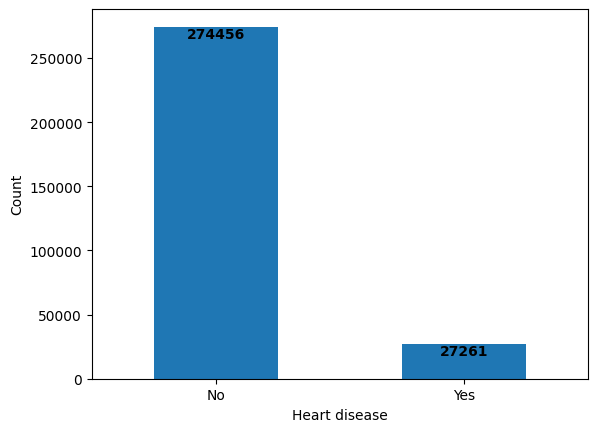

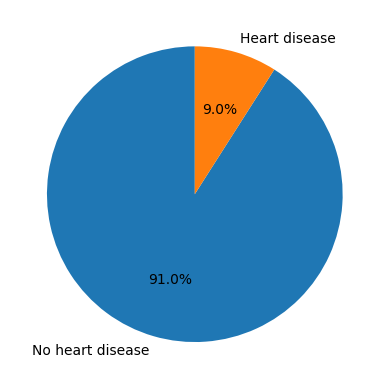

In [7]:
# identify the class imbalance for heart disease target variable 1/0 y/n

# plot a distribution of the target variable set labels for each bar chart and show the count
print(df[target].value_counts(normalize=True).round(2))

# plot the distribution of the target variable
df[target].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Heart disease')
plt.ylabel('Count')
# add a count label to each bar
for i, count in enumerate(df[target].value_counts()):
    plt.text(i, count-50, count, ha='center', va='top', fontweight='bold')

plt.show()

# # get the percentage of people with heart disease on a pie chart
df[target].value_counts(normalize=True).plot(kind='pie', labels=['No heart disease', 'Heart disease'], autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()


In [8]:
# save the cleaned dataset for phase 2 - data processing
df.to_csv('./data/2020/heart_2020_eda.csv', index=False)